<a href="https://colab.research.google.com/github/iGeology-Illinois/geol-581-module-3-principles-of-uncertainty-chapter-4-seanb7/blob/main/Python%20Lab%204.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [93]:
# Database Setup & Data Import
# Create SQLite data tables with CPT data collected from W. Roosevelt and S. Clark Site
import os
import pandas as pd
from sqlalchemy import create_engine

# 1) Create an engine and connect to 'cpt_data.db' (it will be created if not existing)
engine = create_engine('sqlite:///Lab 4 Site Investigation.db')

# Function to process and write data to SQL
def process_and_write_data(file_name, table_name):
    """
    Processes an Excel file and writes its data to a SQL table.

    Args:
        file_name (str): The name of the Excel file.
        table_name (str): The name of the SQL table.
    """
    df_main = pd.read_excel(file_name, sheet_name='Sheet1', skiprows=39)
    df_main.columns = ['Layer', 'Depth_m', 'Depth_ft', 'qc_tsf', 'qt_tsf', 'fs_tsf', 'u_ft', 'Rf_pct']

    # Using a separate connection for each file to avoid locking issues
    with engine.connect() as conn:
        with conn.begin():  # Starting a transaction within the connection
            df_main.to_sql(table_name, con=conn, if_exists='replace', index=False)

# Repeat Step #2-4 for Every Excel File
# CPT_COOK_01
process_and_write_data('24-61-27761_CP24-COOK-01-BSC.XLS', 'cpt_cook_01')

# SPT_COOK_02
process_and_write_data('24-61-27761_SP24-COOK-02-BSC.XLS', 'spt_cook_02')

# CPT_COOK_03
process_and_write_data('24-61-27761_CP24-COOK-03-BSC.XLS', 'cpt_cook_03')

# CPT_COOK_04
process_and_write_data('24-61-27761_CP24-COOK-04-BSC.XLS', 'cpt_cook_04')

# CPT_COOK_06
process_and_write_data('24-61-27761_CP24-COOK-06-BSC.XLS', 'cpt_cook_06')

# SPT_COOK_07
process_and_write_data('24-61-27761_SP24-COOK-07-BSC.XLS', 'spt_cook_07')

# SPT_COOK_02-OFF01
process_and_write_data('24-61-27761_SP24-COOK-02-OFF01-BSC.XLS', 'spt_cook_02_off01')

# SPT_COOK_02-OFF02
process_and_write_data('24-61-27761_SP24-COOK-02-OFF02-BSC.XLS', 'spt_cook_02_off02')

# CPT_COOK_06-OFF01
process_and_write_data('24-61-27761_CP24-COOK-06-OFF01-BSC.XLS', 'cpt_cook_06_off01')

# Verify data import (example for cpt_cook_01)
query = "SELECT * FROM cpt_cook_01 LIMIT 453"
result = pd.read_sql(query, con=engine)
print(result)

query = "SELECT * FROM spt_cook_02 LIMIT 453"
result = pd.read_sql(query, con=engine)
print(result)

query = "SELECT * FROM cpt_cook_03 LIMIT 453"
result = pd.read_sql(query, con=engine)
print(result)

query = "SELECT * FROM cpt_cook_04 LIMIT 453"
result = pd.read_sql(query, con=engine)
print(result)

query = "SELECT * FROM cpt_cook_06 LIMIT 453"
result = pd.read_sql(query, con=engine)
print(result)

query = "SELECT * FROM spt_cook_07 LIMIT 453"
result = pd.read_sql(query, con=engine)
print(result)

query = "SELECT * FROM spt_cook_02_off01 LIMIT 453"
result = pd.read_sql(query, con=engine)
print(result)

query = "SELECT * FROM spt_cook_02_off02 LIMIT 453"
result = pd.read_sql(query, con=engine)
print(result)

query = "SELECT * FROM cpt_cook_06_off01 LIMIT 453"
result = pd.read_sql(query, con=engine)
print(result)

     Layer  Depth_m  Depth_ft   qc_tsf      qt_tsf  fs_tsf    u_ft      Rf_pct
0        1    0.025   0.08202    0.036    0.036730   0.038   0.117  103.456543
1        2    0.050   0.16404   21.657   21.678931   0.080   3.513    0.369022
2        3    0.075   0.24606   41.663   41.696486   0.097   5.364    0.232634
3        4    0.100   0.32808   64.817   64.861517   0.201   7.131    0.309891
4        5    0.125   0.41010   82.667   82.724046   0.490   9.138    0.592331
..     ...      ...       ...      ...         ...     ...     ...         ...
448    449   11.225  36.82698   85.012   85.174604   2.374  26.047    2.787216
449    450   11.250  36.90900  107.297  107.494638   0.000  31.659    0.000000
450    451   11.275  36.99102  169.366  169.486079   0.000  19.235    0.000000
451    452   11.300  37.07304  224.920  225.134487   0.000  34.358    0.000000
452    453   11.325  37.15506  320.828  321.021287   0.000  30.962    0.000000

[453 rows x 8 columns]
    Layer  Depth_m  Depth_ft

In [103]:
# Define a singe table structure in raw SQL
import sqlite3
from sqlalchemy import create_engine, text # Import text
import pandas as pd

# Connect to the SQLite database
# Use the same database file path
engine = create_engine('sqlite:///Lab 4 Site Investigation.db') # Using the same engine as before
conn = engine.connect()

Create_table_query = """CREATE TABLE IF NOT EXISTS CPT_readings (
    Layer TEXT,
    Depth_m REAL,
    Depth_ft REAL,
    qc_tsf REAL,
    qt_tsf REAL,
    fs_tsf REAL,
    u_ft REAL,
    Rf_pct)"""

# Read data from SQL tables into DataFrames
cpt_cook_01 = pd.read_sql_query("SELECT * FROM cpt_cook_01", engine)
spt_cook_02 = pd.read_sql_query("SELECT * FROM spt_cook_02", engine)
cpt_cook_03 = pd.read_sql_query("SELECT * FROM cpt_cook_03", engine)
cpt_cook_04 = pd.read_sql_query("SELECT * FROM cpt_cook_04", engine)
cpt_cook_06 = pd.read_sql_query("SELECT * FROM cpt_cook_06", engine)
spt_cook_07 = pd.read_sql_query("SELECT * FROM spt_cook_07", engine)
spt_cook_02_off01 = pd.read_sql_query("SELECT * FROM spt_cook_02_off01", engine)
spt_cook_02_off02 = pd.read_sql_query("SELECT * FROM spt_cook_02_off02", engine)
cpt_cook_06_off01 = pd.read_sql_query("SELECT * FROM cpt_cook_06_off01", engine)

# Combine CPT excel files for CPT_readings Table
combined_data = pd.concat([
    cpt_cook_01,
    spt_cook_02,
    cpt_cook_03,
    cpt_cook_04,
    cpt_cook_06,
    spt_cook_07,
    spt_cook_02_off01,
    spt_cook_02_off02,
    cpt_cook_06_off01
])
print(combined_data)

# Execute the query using the connection object
with engine.begin() as connection:
    connection.execute(text(Create_table_query)) # Wrap the query with text()

print("Table created successfully.")

    Layer  Depth_m  Depth_ft   qc_tsf      qt_tsf  fs_tsf   u_ft      Rf_pct
0       1    0.025   0.08202    0.036    0.036730   0.038  0.117  103.456543
1       2    0.050   0.16404   21.657   21.678931   0.080  3.513    0.369022
2       3    0.075   0.24606   41.663   41.696486   0.097  5.364    0.232634
3       4    0.100   0.32808   64.817   64.861517   0.201  7.131    0.309891
4       5    0.125   0.41010   82.667   82.724046   0.490  9.138    0.592331
..    ...      ...       ...      ...         ...     ...    ...         ...
32     33    0.825   2.70666  165.495  165.516812   1.585  3.494    0.957607
33     34    0.850   2.78868  194.289  194.311580   0.000  3.617    0.000000
34     35    0.875   2.87070  234.192  234.222883   0.000  4.947    0.000000
35     36    0.900   2.95272  252.265  252.299260   0.000  5.488    0.000000
36     37    0.925   3.03474  292.813  292.851980   0.000  6.244    0.000000

[2724 rows x 8 columns]
Table created successfully.


Average qt (tsf): None
Negative friction ratio rows:
 Empty DataFrame
Columns: [Layer, Depth_m, Depth_ft, qc_tsf, qt_tsf, fs_tsf, u_ft, Rf_pct]
Index: []
Duplicate rows removed successfully.
Data cleaning and validation completed.


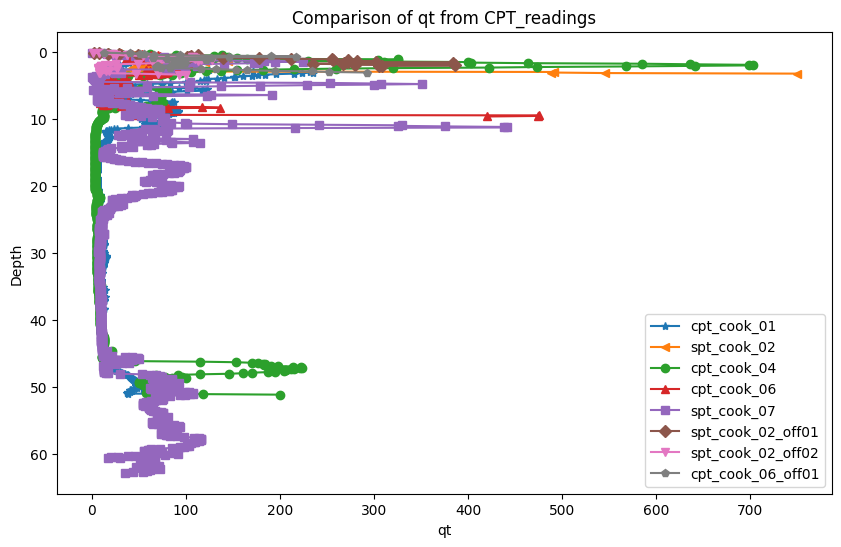

In [117]:
# Data Cleaning and Validation
import sqlite3
import pandas as pd
from sqlalchemy import create_engine, text

# Connect to the SQLite database
# Use the same database file path
engine = create_engine('sqlite:///Lab 4 Site Investigation.db')  # Using the same engine as before
conn = engine.connect()

# Remove rows with null values in the 'Rf_pct' and fs_tsf column (assuming 'friction ration' maps to 'Rf_pct')
# Note: using SQLAlchemy's text() function to execute raw SQL
with engine.begin() as connection:  # Using a transaction for safety
    connection.execute(text('DELETE FROM CPT_readings WHERE Rf_pct IS NULL OR fs_tsf IS NULL'))

# Retrieving average tip resistance (qt) for CPT_readings
query_avg = """
    SELECT AVG(qt_tsf) AS avg_qt
    FROM CPT_readings
"""
avg_qt = pd.read_sql(query_avg, con=engine)
print("Average qt (tsf):", avg_qt['avg_qt'][0])

# Finding rows with negative friction ratio
query_neg_rf = """
    SELECT *
    FROM CPT_readings
    WHERE rf_pct < 0
"""
negatives = pd.read_sql(query_neg_rf, con=engine)
print("Negative friction ratio rows:\n", negatives)

# Remove duplicate rows based on a specific column - Changed 'friction ration' to 'Rf_pct'
with engine.begin() as connection:  # Using a transaction
    connection.execute(text('''
        DELETE FROM CPT_readings
        WHERE rowid NOT IN (
            SELECT MIN(rowid)
            FROM CPT_readings
            GROUP BY Rf_pct
        )
    '''))

# Fetch cleaned data into DataFrames for printing and further processing
cleaned_dataframe = pd.read_sql('SELECT * FROM CPT_readings', con=engine)

print("Duplicate rows removed successfully.")
print("Data cleaning and validation completed.")

# Convert dictionaries to DataFrames
df_01 = pd.DataFrame(cpt_cook_01)
df_02 = pd.DataFrame(spt_cook_02)
df_03 = pd.DataFrame(cpt_cook_03)
df_04 = pd.DataFrame(cpt_cook_04)
df_05 = pd.DataFrame(cpt_cook_06)
df_06 = pd.DataFrame(spt_cook_07)
df_07 = pd.DataFrame(spt_cook_02_off01)
df_08 = pd.DataFrame(spt_cook_02_off02)
df_09 = pd.DataFrame(cpt_cook_06_off01)

# Merge dataframes iteratively
# Start with the first two dataframes
merged_df = pd.merge(df_01, df_02, on='Depth_ft', how='outer', suffixes=('_01', '_02')) # Changed 'depth' to 'Depth_ft' for clarity

# Merge the remaining dataframes one by one, checking for 'qt_tsf' column
for i, df in enumerate([df_03, df_04, df_05, df_06, df_07, df_08, df_09], start=3):
    # Check if 'qt_tsf' exists in the current DataFrame
    suffix = f'_0{i}'
    if 'qt_tsf' in df.columns:
        merged_df = pd.merge(merged_df, df, on='Depth_ft', how='outer', suffixes=('', suffix))
    else:
        # If 'qt_tsf' is not found, print a message or handle it appropriately
        print(f"DataFrame df_0{i} does not contain 'qt_tsf' column. Skipping merge for this DataFrame.")


# Plotting
# Import matplotlib.pyplot
import matplotlib.pyplot as plt # Import the library

plt.figure(figsize=(10, 6))
plt.plot(merged_df['qt_tsf'], merged_df['Depth_ft'], label='cpt_cook_01', marker='*')
# If 'qt_tsf_02' exists in merged_df, plot it
if 'qt_tsf_02' in merged_df.columns:
    plt.plot(merged_df['qt_tsf_02'], merged_df['Depth_ft'], label='spt_cook_02', marker='<')
# If 'qt_tsf_03' exists in merged_df, plot it
if 'qt_tsf_03' in merged_df.columns:
    plt.plot(merged_df['qt_tsf_03'], merged_df['Depth_ft'], label='cpt_cook_03', marker='x')
# If 'qt_tsf_04' exists in merged_df, plot it
if 'qt_tsf_04' in merged_df.columns:
    plt.plot(merged_df['qt_tsf_04'], merged_df['Depth_ft'], label='cpt_cook_04', marker='o')
# If 'qt_tsf_05' existg in merged_df, plot it
if 'qt_tsf_05' in merged_df.columns:
    plt.plot(merged_df['qt_tsf_05'], merged_df['Depth_ft'], label='cpt_cook_06', marker='^')
# If 'qt_tsf_06' exists in merged_df, plot it
if 'qt_tsf_06' in merged_df.columns:
    plt.plot(merged_df['qt_tsf_06'], merged_df['Depth_ft'], label='spt_cook_07', marker='s')
# If 'qt_tsf_07' exists in merged_df, plot it
if 'qt_tsf_07' in merged_df.columns:
    plt.plot(merged_df['qt_tsf_07'], merged_df['Depth_ft'], label='spt_cook_02_off01', marker='D')
# If 'qt_tsf_08' exists in merged_df, plot it
if 'qt_tsf_08' in merged_df.columns:
    plt.plot(merged_df['qt_tsf_08'], merged_df['Depth_ft'], label='spt_cook_02_off02', marker='v')
# If 'qt_tsf_09' exists in merged_df, plot it
if 'qt_tsf_09' in merged_df.columns:
    plt.plot(merged_df['qt_tsf_09'], merged_df['Depth_ft'], label='cpt_cook_06_off01', marker='p')

# Invert y-axis to have depth increasing downwards
plt.gca().invert_yaxis()

# Adding labels and title
plt.xlabel('qt')
plt.ylabel('Depth')
plt.title('Comparison of qt from CPT_readings')
plt.legend()

# Show plot
plt.show()

# Commit the changes
conn.commit()

In [132]:
# Statistical Summary of Soundings
# Note of any differences between soundings (deeper phreatic)
# Assign a unique sounding ID to each DataFrame
cpt_cook_01['sounding_id'] = 'CPT_readings1'
spt_cook_02['sounding_id'] = 'SPT_readings2'
cpt_cook_03['sounding_id'] = 'CPT_readings3'
cpt_cook_04['sounding_id'] = 'CPT_readings4'
cpt_cook_06['sounding_id'] = 'CPT_readings5'
spt_cook_07['sounding_id'] = 'SPT_readings6'
spt_cook_02_off01['sounding_id'] = 'SPT_readings7'
spt_cook_02_off02['sounding_id'] = 'SPT_readings8'
cpt_cook_06_off01['sounding_id'] = 'CPT_readings9'

# Re-create the combined_data DataFrame with the sounding_id column included
combined_data = pd.concat([
    cpt_cook_01,
    spt_cook_02,
    cpt_cook_03,
    cpt_cook_04,
    cpt_cook_06,
    spt_cook_07,
    spt_cook_02_off01,
    spt_cook_02_off02,
    cpt_cook_06_off01
])

# Perform the groupby operation
soundings = combined_data.groupby('sounding_id')

# Print the result
print(soundings)

# Access the descriptive statistics for each sounding using a loop
for sounding_id, group_data in soundings:
    print(f"Descriptive Statistics for {sounding_id}:\n")
    print(group_data.describe())
    print("\n")

Descriptive Statistics for CPT_readings1:

            Layer     Depth_m    Depth_ft      qc_tsf      qt_tsf      fs_tsf  \
count  453.000000  453.000000  453.000000  453.000000  453.000000  453.000000   
mean   227.000000    5.675000   18.618540   72.228536   72.489938    0.529095   
std    130.914094    3.272852   10.737574  140.927078  140.833884    0.681304   
min      1.000000    0.025000    0.082020    0.036000    0.036730    0.000000   
25%    114.000000    2.850000    9.350280    6.431000    6.852103    0.119000   
50%    227.000000    5.675000   18.618540    8.256000    8.724510    0.163000   
75%    340.000000    8.500000   27.886800   32.324000   32.228424    0.652000   
max    453.000000   11.325000   37.155060  597.596000  597.637826    3.671000   

             u_ft      Rf_pct  
count  453.000000  453.000000  
mean    41.873091    2.152365  
std     33.774784    4.922021  
min    -21.704000    0.000000  
25%     11.087000    1.355379  
50%     37.754000    1.752176  
75%

In [134]:
import pandas as pd
import sqlite3

# Assuming 'cleaned_dataframe' contains all the data from 'CPT_readings' table
summary_statistics = soundings.describe()


# Define key columns for statistical analysis. Depth.1 is in ft.
key_columns = ["Depth_ft", "qc_tsf", "qt_tsf", "fs_tsf", "u_ft", "Rf_pct"]  # Use actual column names

print(summary_statistics)

               Layer                                                        \
               count   mean         std  min     25%    50%     75%    max   
sounding_id                                                                  
CPT_readings1  453.0  227.0  130.914094  1.0  114.00  227.0  340.00  453.0   
CPT_readings3  622.0  311.5  179.700213  1.0  156.25  311.5  466.75  622.0   
CPT_readings4  623.0  312.0  179.988889  1.0  156.50  312.0  467.50  623.0   
CPT_readings5  117.0   59.0   33.919021  1.0   30.00   59.0   88.00  117.0   
CPT_readings9   37.0   19.0   10.824355  1.0   10.00   19.0   28.00   37.0   
SPT_readings2   39.0   20.0   11.401754  1.0   10.50   20.0   29.50   39.0   
SPT_readings6  765.0  383.0  220.980768  1.0  192.00  383.0  574.00  765.0   
SPT_readings7   26.0   13.5    7.648529  1.0    7.25   13.5   19.75   26.0   
SPT_readings8   42.0   21.5   12.267844  1.0   11.25   21.5   31.75   42.0   

              Depth_m          ...       u_ft          Rf_pct  